         Customer Id        Age       Edu  Years Employed      Income  \
Clus_km                                                                 
0         432.006154  32.967692  1.613846        6.389231   31.204615   
1         410.166667  45.388889  2.666667       19.555556  227.166667   
2         403.780220  41.368132  1.961538       15.252747   84.076923   

         Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Clus_km                                                     
0         1.032711    2.108345   0.284658        10.095385  
1         5.678444   10.907167   0.285714         7.322222  
2         3.114412    5.770352   0.172414        10.725824  


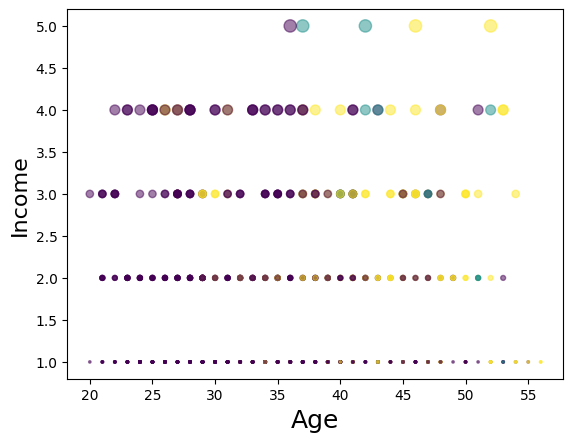

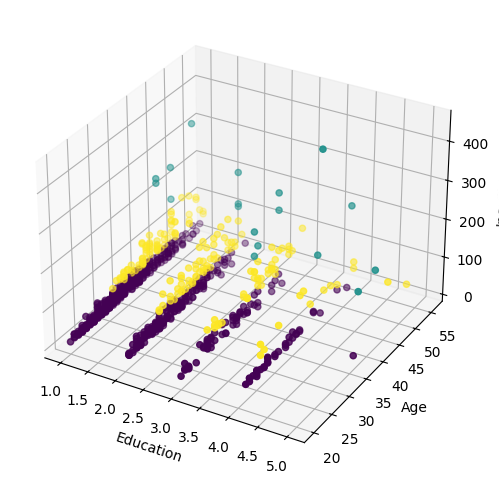

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Load the data
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df.head()

# Drop 'Address' column
df = cust_df.drop('Address', axis=1)
df.head()

# Preprocess data: Standardize the features
X = df.values[:, 1:]  # Exclude the 'CustomerID' column, assuming the first column is an ID
X = np.nan_to_num(X)  # Replace NaN values with 0
Clus_dataSet = StandardScaler().fit_transform(X)

# KMeans clustering
clusterNum = 3
k_means = KMeans(init="k-means++", n_clusters=clusterNum, n_init=12)
k_means.fit(X)
labels = k_means.labels_

# Add cluster labels to the dataframe
df["Clus_km"] = labels
df.head(5)

# Group by clusters and display the mean of each feature
print(df.groupby('Clus_km').mean())

# Scatter plot (2D)
area = np.pi * (X[:, 1])**2  # Area for the scatter plot markers (adjust as necessary)
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(float), alpha=0.5)  # Use X[:, 0] and X[:, 1] for plotting
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

# 3D Plotting
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = fig.add_subplot(111, projection='3d')  # Create 3D axis
ax.set_xlabel('Education')  # Set the X label
ax.set_ylabel('Age')        # Set the Y label
ax.set_zlabel('Income')     # Set the Z label

# Ensure there are at least 4 columns in X, else adjust the plotting indices
if X.shape[1] > 3:
    ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=labels.astype(float))  # 3D scatter plot
else:
    print("Error: X does not have enough features for 3D plotting.")
    
plt.show()
